#Fandango movie Ratings

##Overview

[Fandango](https://www.fandango.com) is an American ticketing company that sells movie tickets via their website and app. It is also the provider of television and media imformation. 

In October, 2015, [Fivethirtyeight](https://fivethirtyeight.com) published an article titled as [Be Suspicious Of Online Movie Ratings, Especially Fandango’s](https://fivethirtyeight.com/features/fandango-movies-ratings/) questioning Fandango's movie ratings into question. They noted that hardly any movie was rated below 3. Certain movies like "Fantastic Four" then had a 3 star rating making the ticket buyers to perceive it as a decent movie.

##Question to be analysed?

Is there a conflict of interest for websites like Fandango that sells movie tickets and displays movie ratings?

In other words, does Fandango displays higher review ratings in order to sell more tickets online?



---



---



##Let's get started

So, let's first start off by importing the required python libraries.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Read in the data from the csv file.

In [ ]:
fandango = pd.read_csv("data/fandango_scrape.csv")

Have a look glance at the fandango user ratings data.

In [ ]:
fandango.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


Baisic info about the data (like the datatypes of each column, number of non-null values, number of non-null vales etc.)

In [ ]:
fandango.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


The 5-point summary statistics and more of the relevant coulmns in the fandango dataset.

In [ ]:
fandango.describe()

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


Get the yearly data of the films

In [ ]:
fandango['YEAR'] = fandango['FILM'].apply(lambda name: name[-5:-1])

Count the number of films per year

In [ ]:
fandango.YEAR.value_counts()

2015    478
2014     23
1964      1
2012      1
2016      1
Name: YEAR, dtype: int64

Visualize the above table

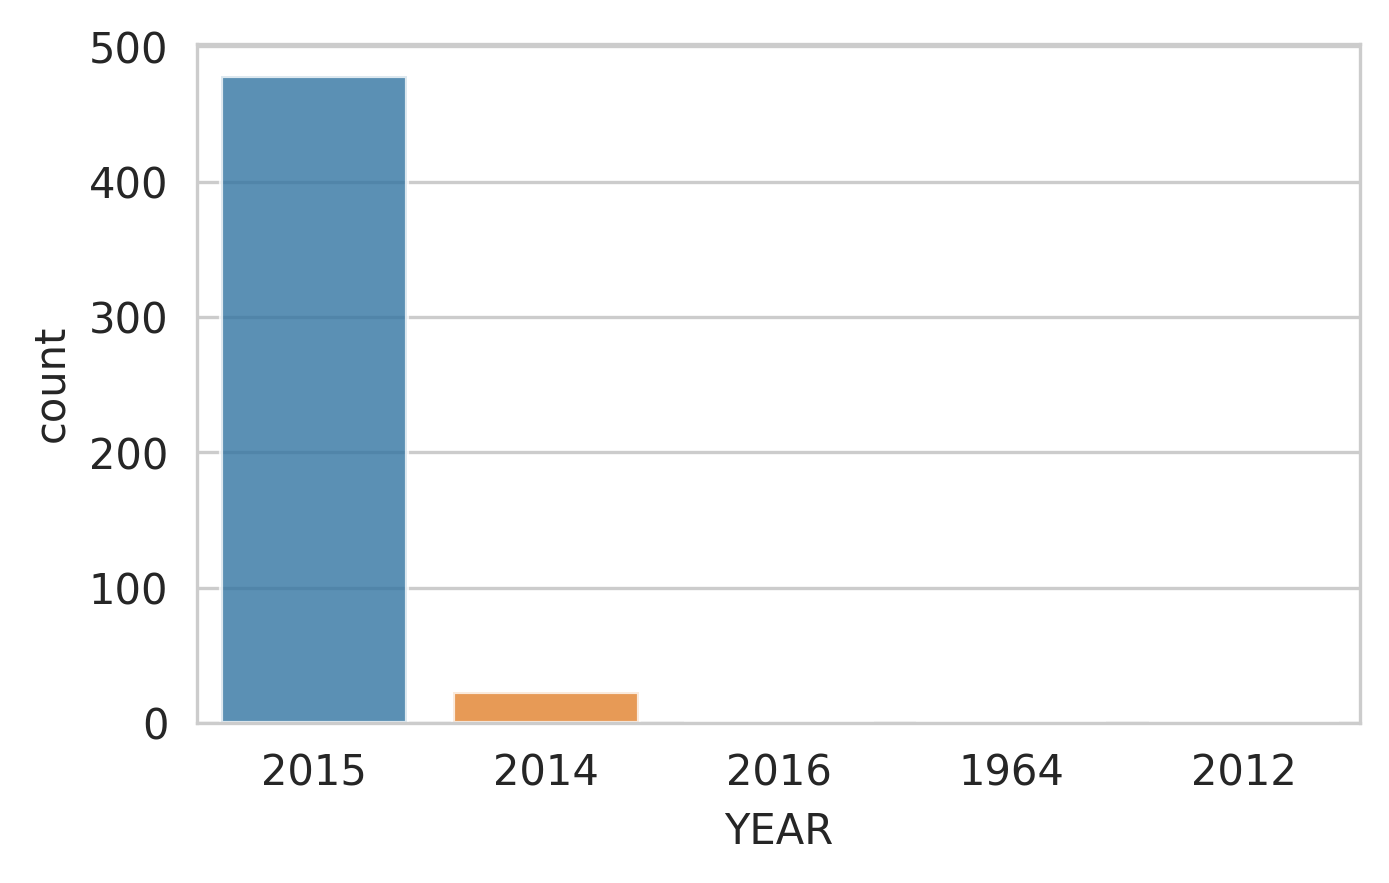

In [ ]:
plt.figure(figsize=(5,3), dpi = 300)
sns.set_style('whitegrid')
sns.countplot(x="YEAR", data=fandango, alpha=0.8)

**Update the dataframe by only keeping the reviewed films by removing any films that have zero votes.**

In [ ]:
fandango = fandango[fandango['VOTES']>0]

As noted in the article, due to HTML and star rating displays, the true user rating are sometimes slightly different than the rating shown to a user. Let's visualize this difference in distributions.

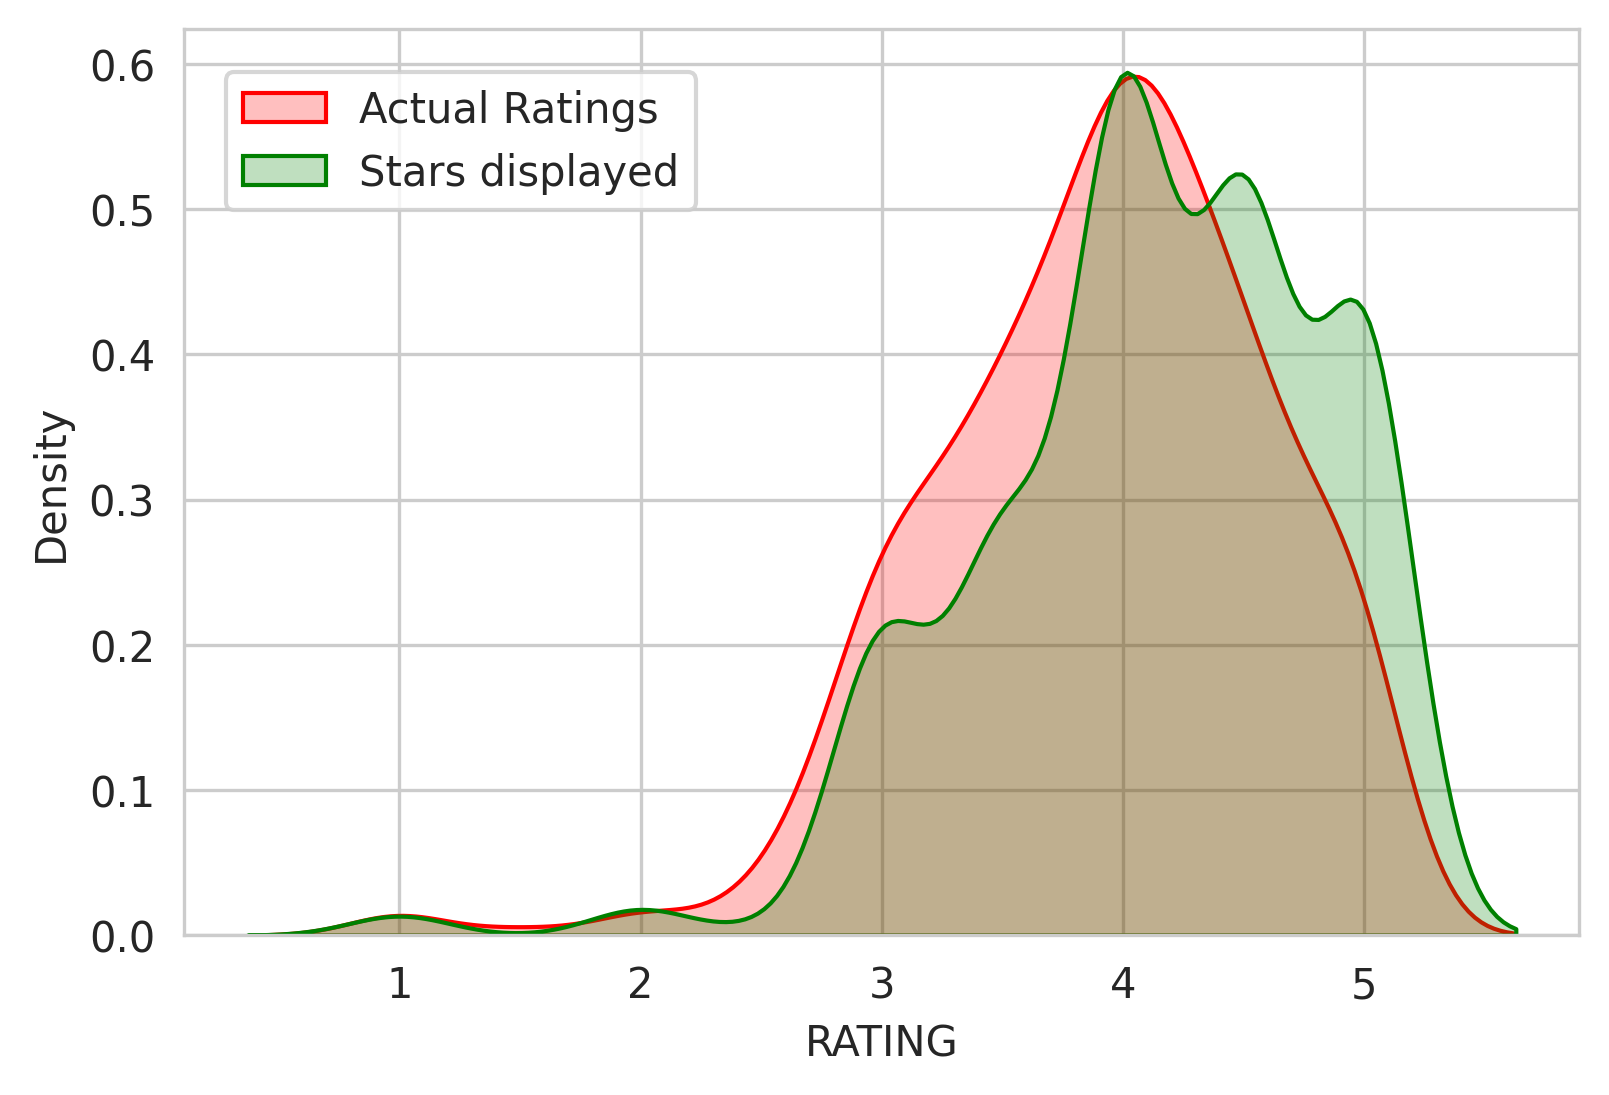

In [ ]:
plt.figure(dpi = 300)

sns.kdeplot(x='RATING', data=fandango, fill=True, label='Actual Ratings', color="red")
sns.kdeplot(x='STARS', data=fandango, fill=True, label="Stars displayed", color="green")
plt.legend(loc=(0.03, 0.8))

**As we can see from the above kdeplot, the ratings shown on the HTML of the webpage and the actual ratings differ for most movies**

Now, lets try to quantify this difference of the stars displayed and actual ratings

In [ ]:
fandango['STARS_DIFF'] = np.round(fandango['STARS'] - fandango['RATING'], decimals=1)

In [ ]:
fandango.head()

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0
2,American Sniper (2015),5.0,4.8,34085,2015,0.2
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2
4,Inside Out (2015),4.5,4.5,15749,2015,0.0


In [ ]:
fandango['STARS_DIFF'].value_counts()

0.0    107
0.2     82
0.3     72
0.4     70
0.1     66
0.5     37
1.0      1
Name: STARS_DIFF, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

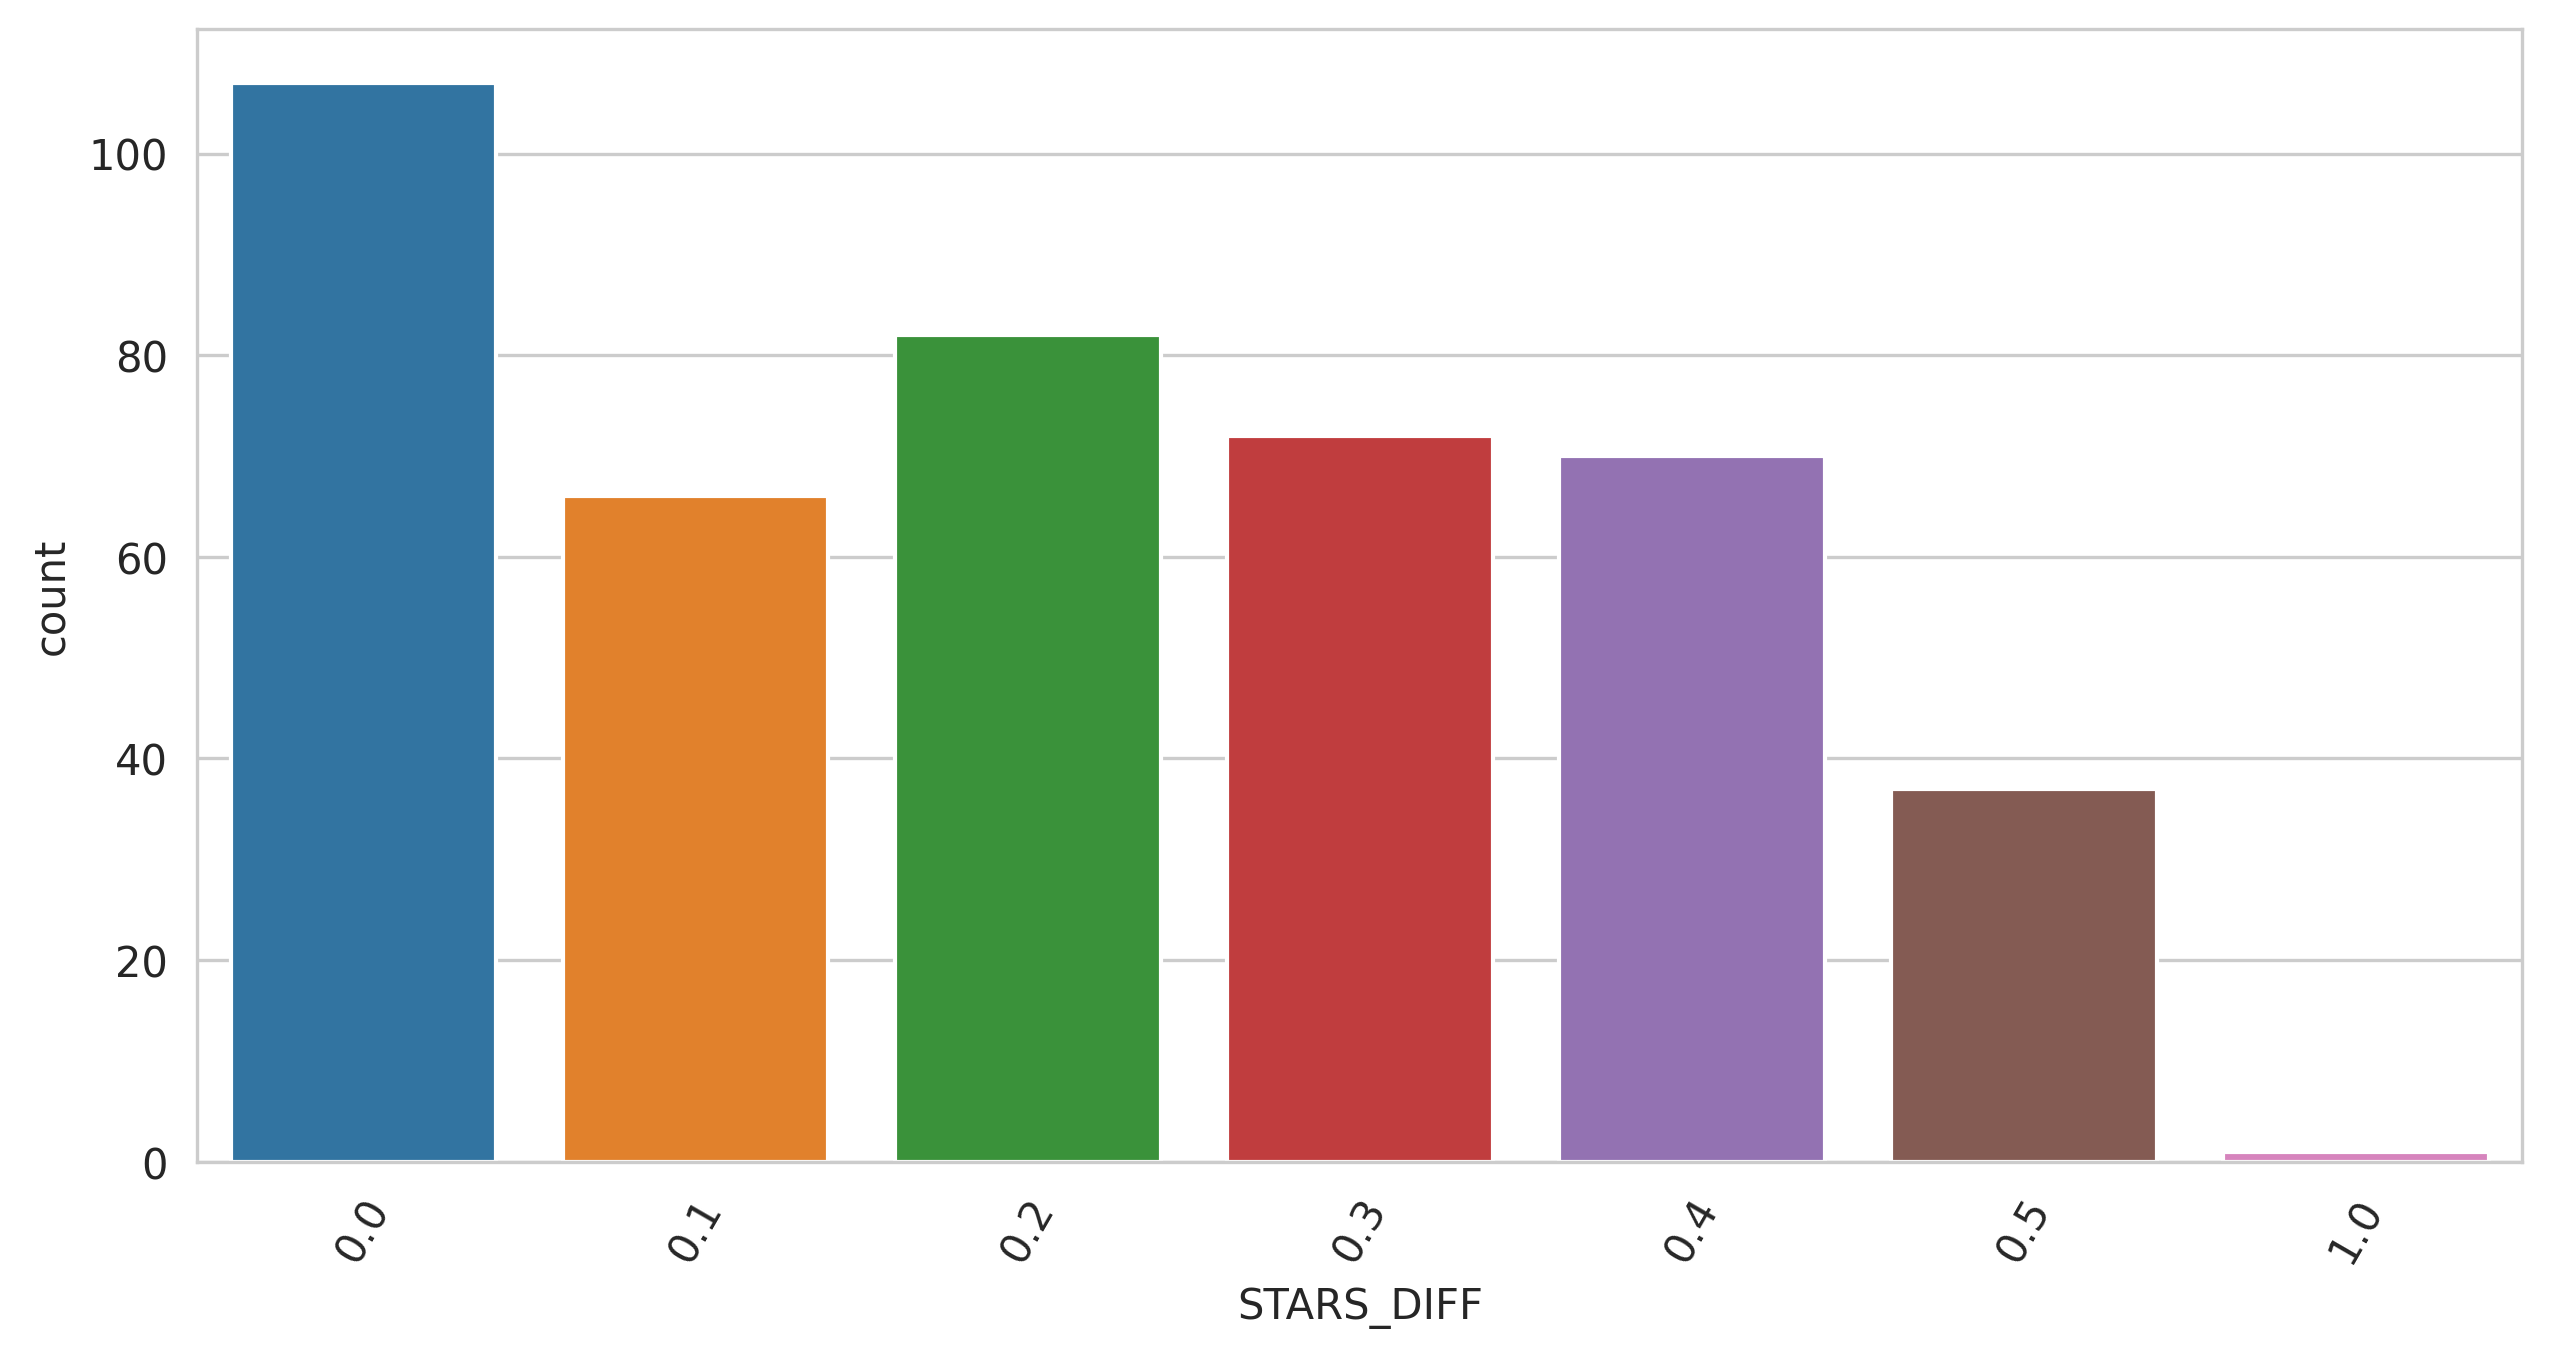

In [ ]:
plt.figure(figsize=(10,5), dpi=300)

sns.countplot(x='STARS_DIFF', data=fandango)
plt.xticks(rotation=60)

As we can see we do have quite a few ratings whose difference is mroe than 0.2. So clearly, its not something that can be accounted for rounding off.

Lets count how may films have a difference in rating of 0.3 and above.

In [ ]:
len_03 = len(fandango[fandango['STARS_DIFF'] >= 0.3].index)
len_03

180

In [ ]:
(len_03 * 100) / len(fandango.index)

41.37931034482759

As we can see **41.38%** of the films have a Star count thats more than what would we get when rounding them off.

**Note:** We can see we do have a film whose difference is 1. Let's see which film is it.

In [ ]:
fandango[fandango['STARS_DIFF'] == 1]

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
381,Turbo Kid (2015),5.0,4.0,2,2015,1.0


### Comparision with other sites

The article also compared the ratings with the other movie rating websites like [IMDb](https://www.imdb.com), [Rotten Tomatoes](https://www.rottentomatoes.com) and [Metacritic](https://www.metacritic.com).

In [ ]:
other_sites = pd.read_csv('data/all_sites_scores.csv')

In [ ]:
other_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


In [ ]:
other_sites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.2+ KB


In [ ]:
other_sites.describe()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,185.705479,42846.205479
std,30.168799,20.024430,19.517389,1.510712,0.958736,316.606515,67406.509171
min,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,33.250000,5627.000000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,72.500000,19103.000000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,168.500000,45185.750000
max,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000


## Normalising the data

Different sites use different scales to rate movies. Like for example, Fandango uses a scales of 5, IMDb uses a scale of 10, etc.

So we need to normalize the data first and bring them all to a common scale to compare them

**For our purposes we will use the scale used by Fandango and convert all the ratings on the scale of 5.**

In [ ]:
# Normalising Rotten Tomatoes ratings
other_sites['RottenTomatoes'] = np.round(other_sites['RottenTomatoes'] / 20, decimals = 1)
other_sites['RottenTomatoes_User'] = np.round(other_sites['RottenTomatoes_User'] / 20, decimals = 1)

In [ ]:
other_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB
0,Avengers: Age of Ultron (2015),3.7,4.3,3.3,3.6,3.9
1,Cinderella (2015),4.2,4.0,3.4,3.8,3.6
2,Ant-Man (2015),4.0,4.5,3.2,4.0,3.9
3,Do You Believe? (2015),0.9,4.2,1.1,2.4,2.7
4,Hot Tub Time Machine 2 (2015),0.7,1.4,1.4,1.7,2.6


In [ ]:
# Normalising Metacritic ratings
other_sites['Metacritic'] = np.round(other_sites['Metacritic'] / 20, decimals=1)
other_sites['Metacritic_User'] = np.round(other_sites['Metacritic_User'] / 2, decimals=1)

In [ ]:
# Normalising IMDb ratings
other_sites['IMDB'] = np.round(other_sites['IMDB'] / 2, decimals=1)

Adding the ratings of all the websites into a new DataFrame.

**For now we are not interested in the user counts of the different websites. So it can be a good idea to drop those columns from out dataset and add the stars and ratings columns of Fandango**

In [ ]:
# drop the vote counts
other_sites = other_sites.drop(labels=["Metacritic_user_vote_count", "IMDB_user_vote_count"], axis=1)

In [ ]:
ratings = other_sites.copy()

In [ ]:
ratings['Fandango_STARS'] = fandango['STARS']
ratings['Fandango_Rating'] = fandango['RATING']

In [ ]:
ratings.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_STARS,Fandango_Rating
0,Avengers: Age of Ultron (2015),3.7,4.3,3.3,3.6,3.9,4.0,3.9
1,Cinderella (2015),4.2,4.0,3.4,3.8,3.6,4.5,4.5
2,Ant-Man (2015),4.0,4.5,3.2,4.0,3.9,5.0,4.8
3,Do You Believe? (2015),0.9,4.2,1.1,2.4,2.7,5.0,4.8
4,Hot Tub Time Machine 2 (2015),0.7,1.4,1.4,1.7,2.6,4.5,4.5


In [ ]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   FILM                 146 non-null    object 
 1   RottenTomatoes       146 non-null    float64
 2   RottenTomatoes_User  146 non-null    float64
 3   Metacritic           146 non-null    float64
 4   Metacritic_User      146 non-null    float64
 5   IMDB                 146 non-null    float64
 6   Fandango_STARS       146 non-null    float64
 7   Fandango_Rating      146 non-null    float64
dtypes: float64(7), object(1)
memory usage: 9.2+ KB


In [ ]:
ratings.describe()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_STARS,Fandango_Rating
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,3.043836,3.189726,2.948630,3.258904,3.373288,4.212329,3.970548
std,1.509463,0.999084,0.976569,0.762995,0.478113,0.583791,0.550005
min,0.200000,1.000000,0.600000,1.200000,2.000000,3.000000,2.700000
25%,1.600000,2.500000,2.200000,2.800000,3.200000,4.000000,3.600000
50%,3.200000,3.350000,3.000000,3.400000,3.400000,4.500000,4.100000
75%,4.400000,4.000000,3.800000,3.800000,3.700000,4.500000,4.400000
max,5.000000,4.700000,4.700000,4.800000,4.300000,5.000000,4.900000


###Comparison with IMDb

Let's plot the IMDb ratings vs Fandango ratings of the movies.

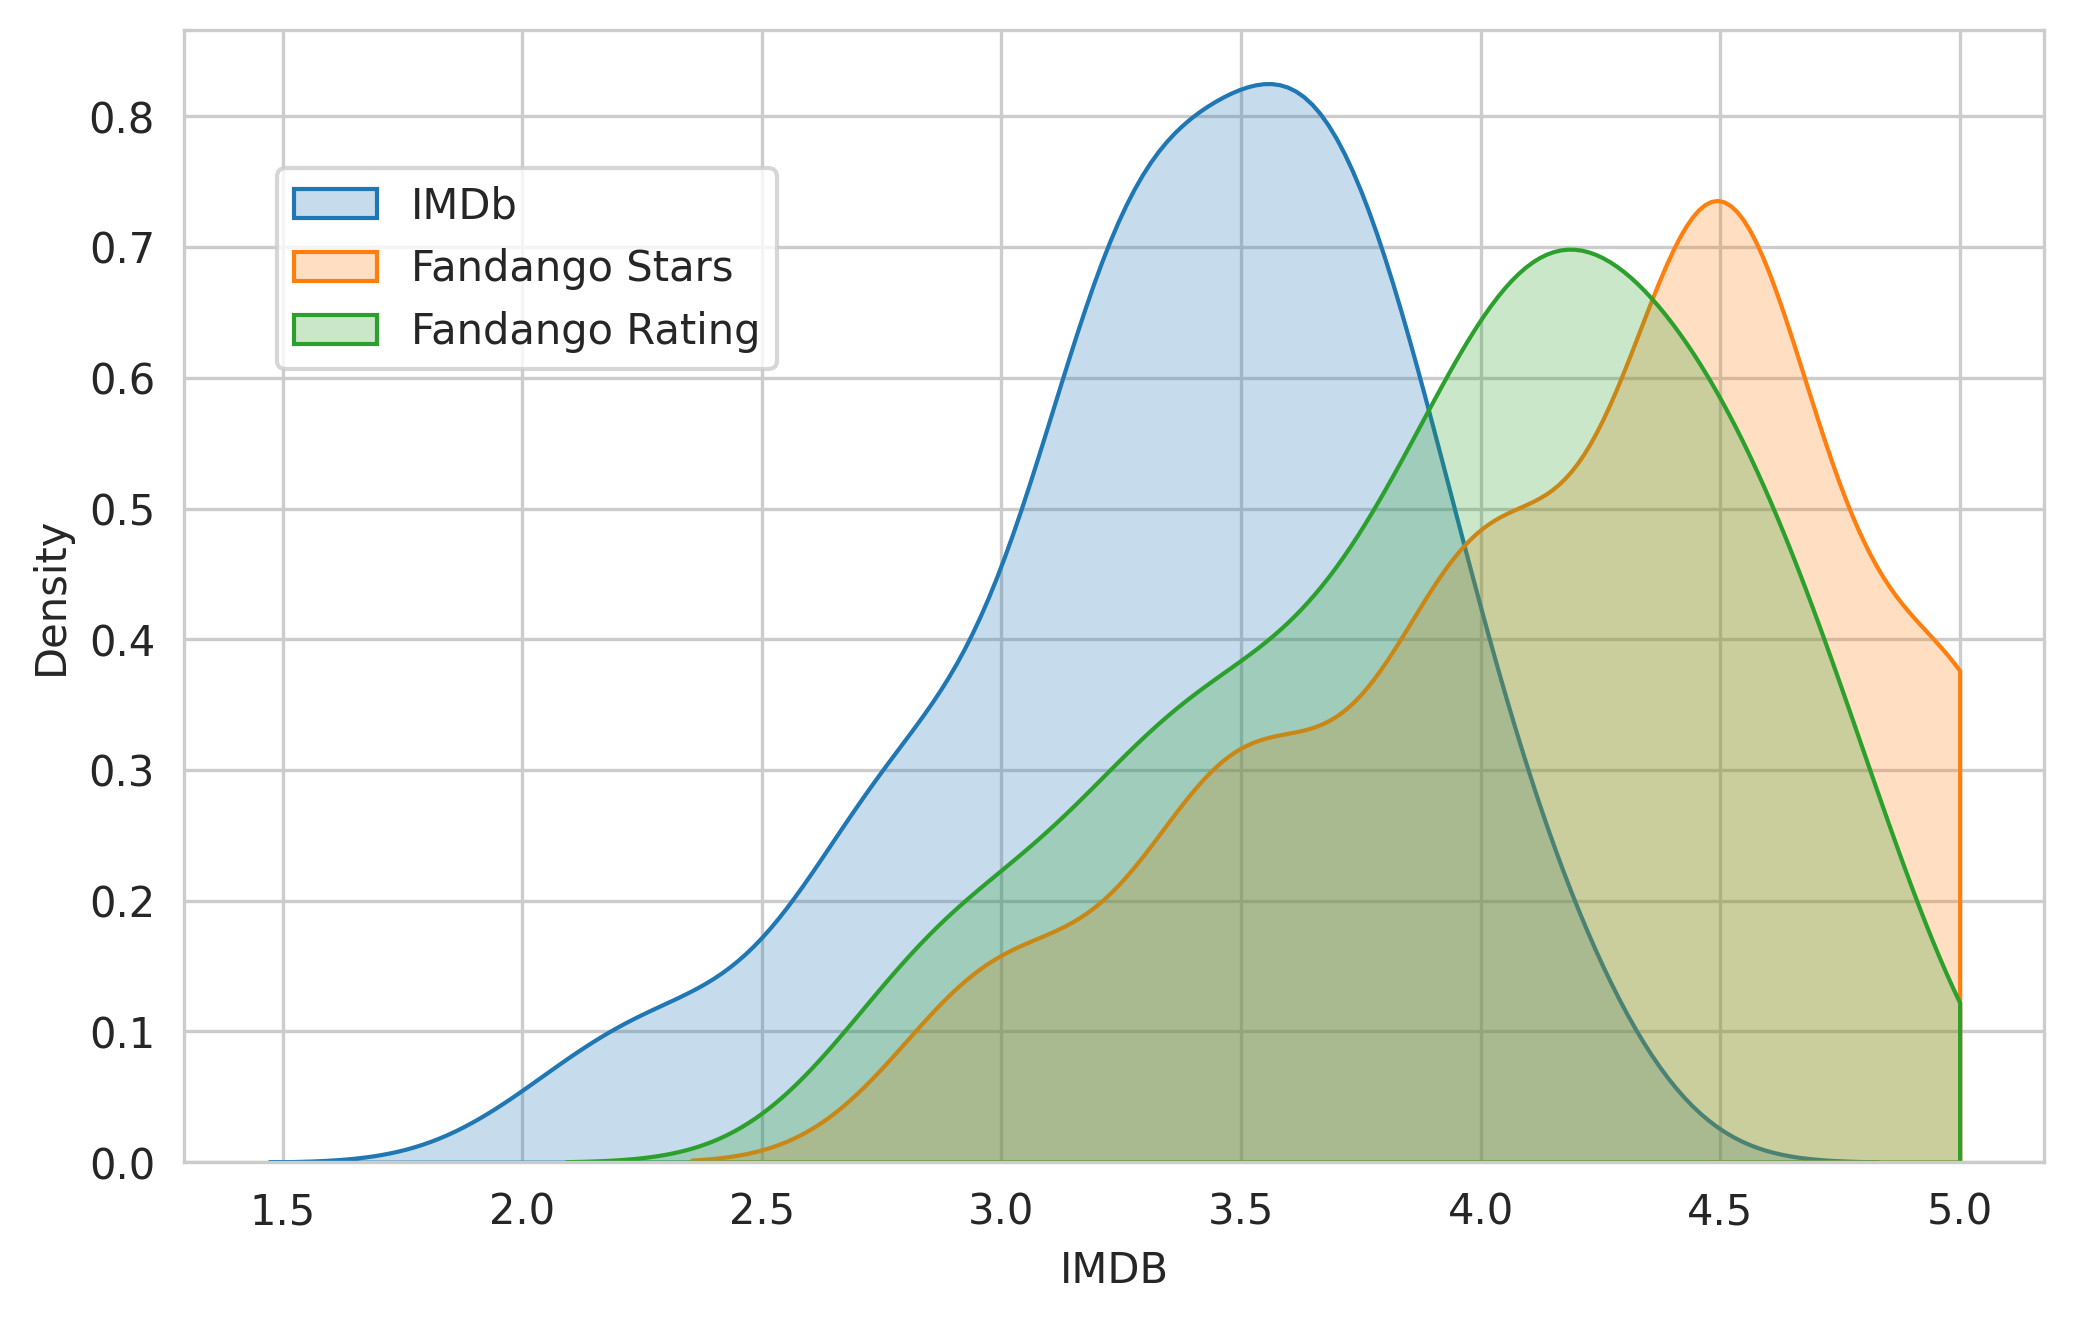

In [ ]:
plt.figure(figsize=(8,5), dpi = 300)
sns.kdeplot(x="IMDB", data=ratings, fill = True, clip=(0,5), label="IMDb")
sns.kdeplot(x="Fandango_STARS", data=ratings, fill=True, clip=(0,5), label="Fandango Stars")
sns.kdeplot(x="Fandango_Rating", data=ratings, fill=True, clip=(0,5), label = "Fandango Rating")

plt.legend(loc=(0.05, 0.7))

##Comparison with Metacritic

Lets compare the Metacritic ratings and the Fandango ratings.

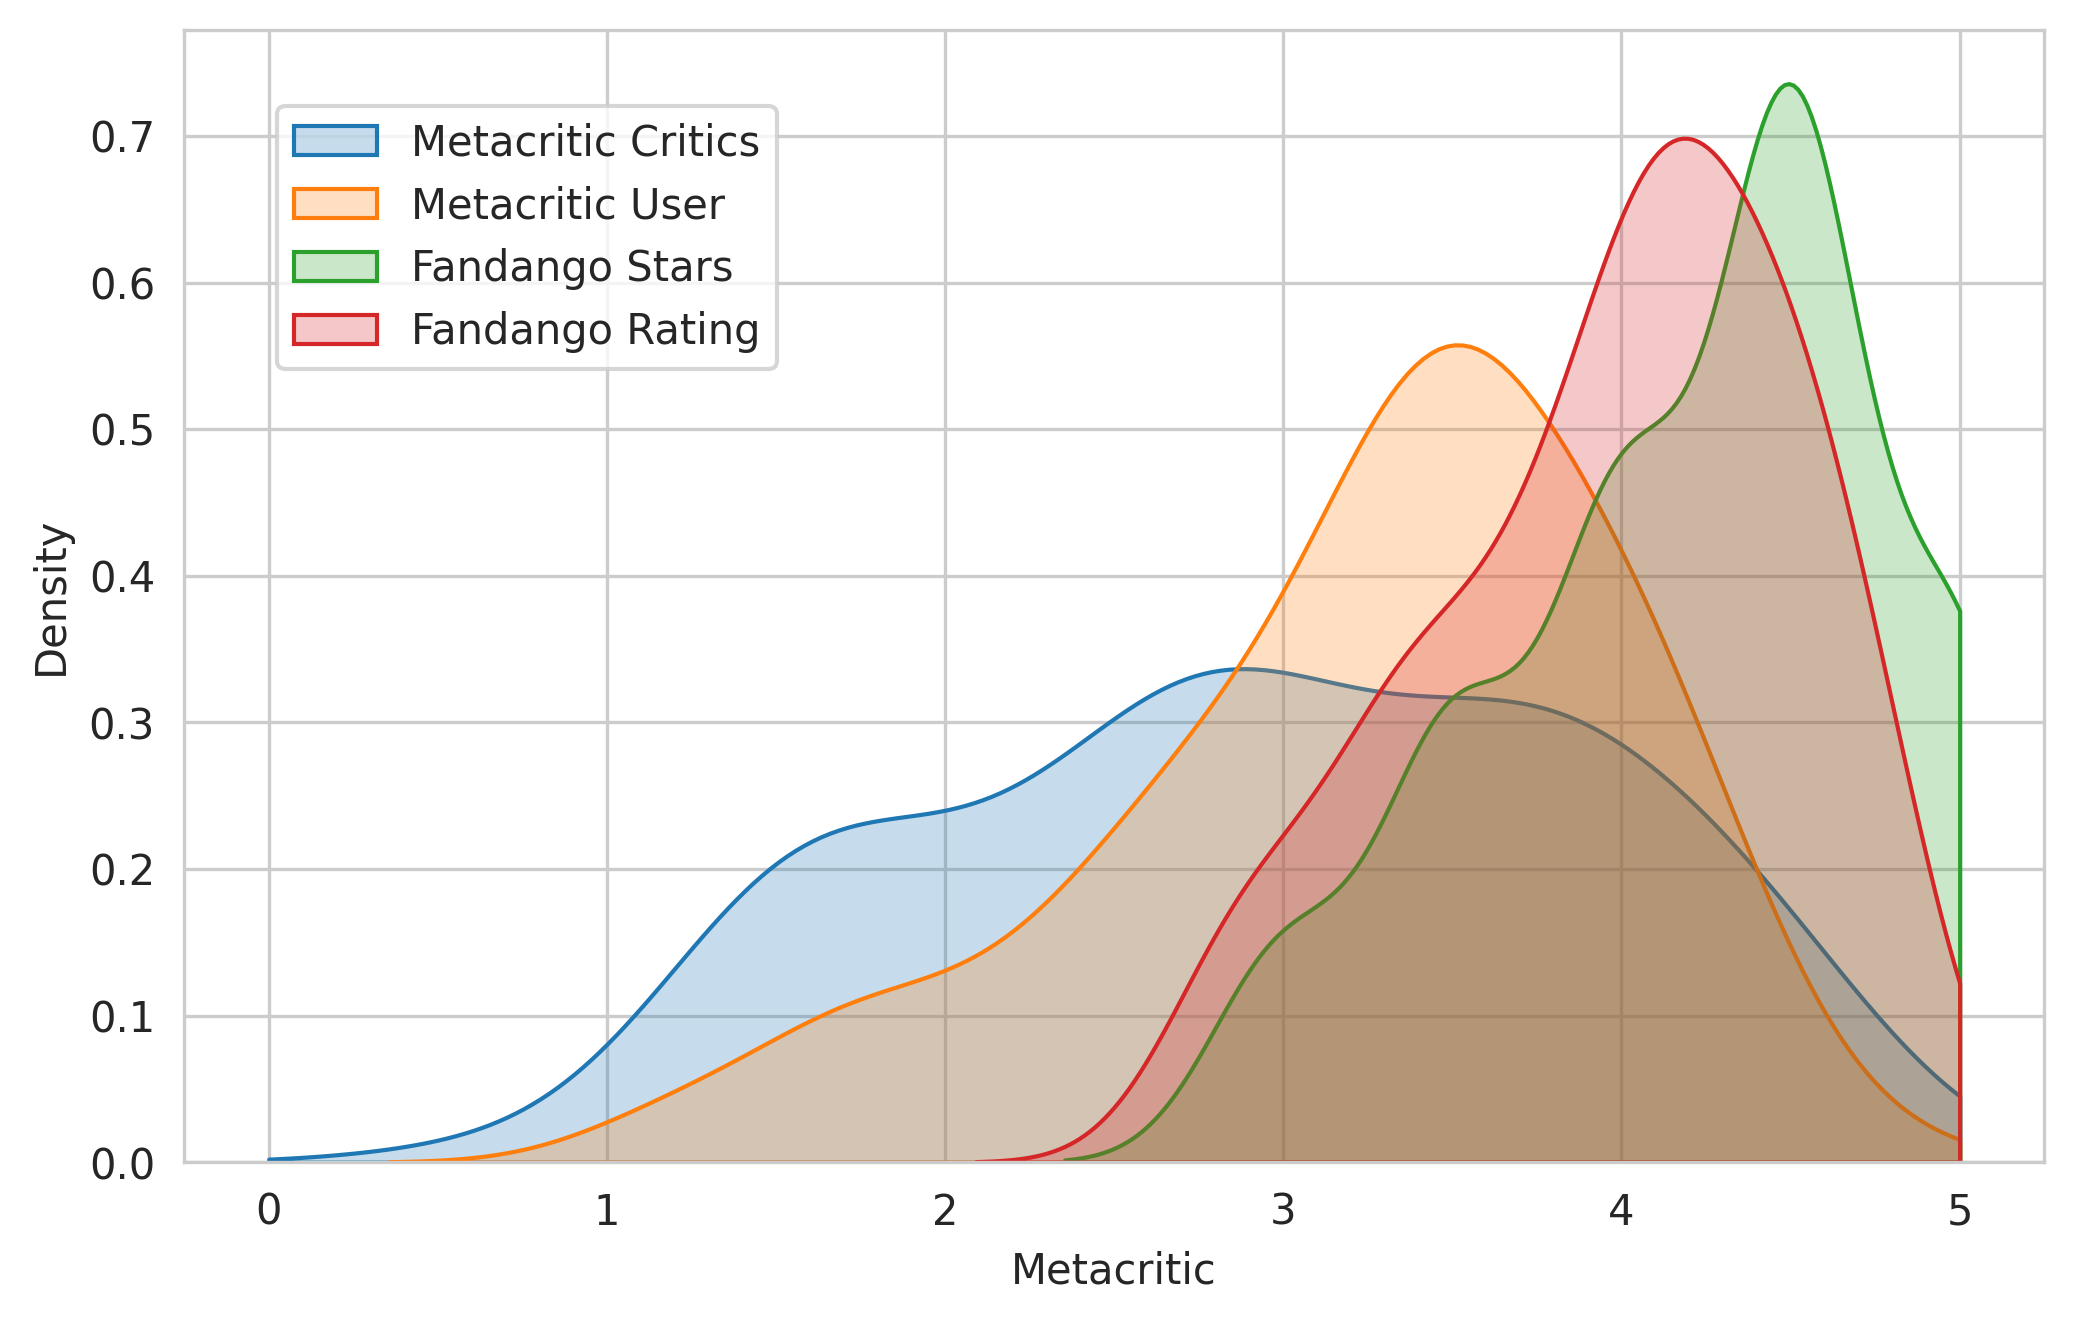

In [ ]:
plt.figure(figsize=(8,5), dpi = 300)
sns.kdeplot(x="Metacritic", data=ratings, fill = True, clip=(0,5), label="Metacritic Critics")
sns.kdeplot(x="Metacritic_User", data=ratings, fill=True, clip=(0,5), label="Metacritic User")
sns.kdeplot(x="Fandango_STARS", data=ratings, fill=True, clip=(0,5), label="Fandango Stars")
sns.kdeplot(x="Fandango_Rating", data=ratings, fill=True, clip=(0,5), label = "Fandango Rating")

plt.legend(loc=(0.05, 0.7))

##Comparison with Rotten Tomatoes.

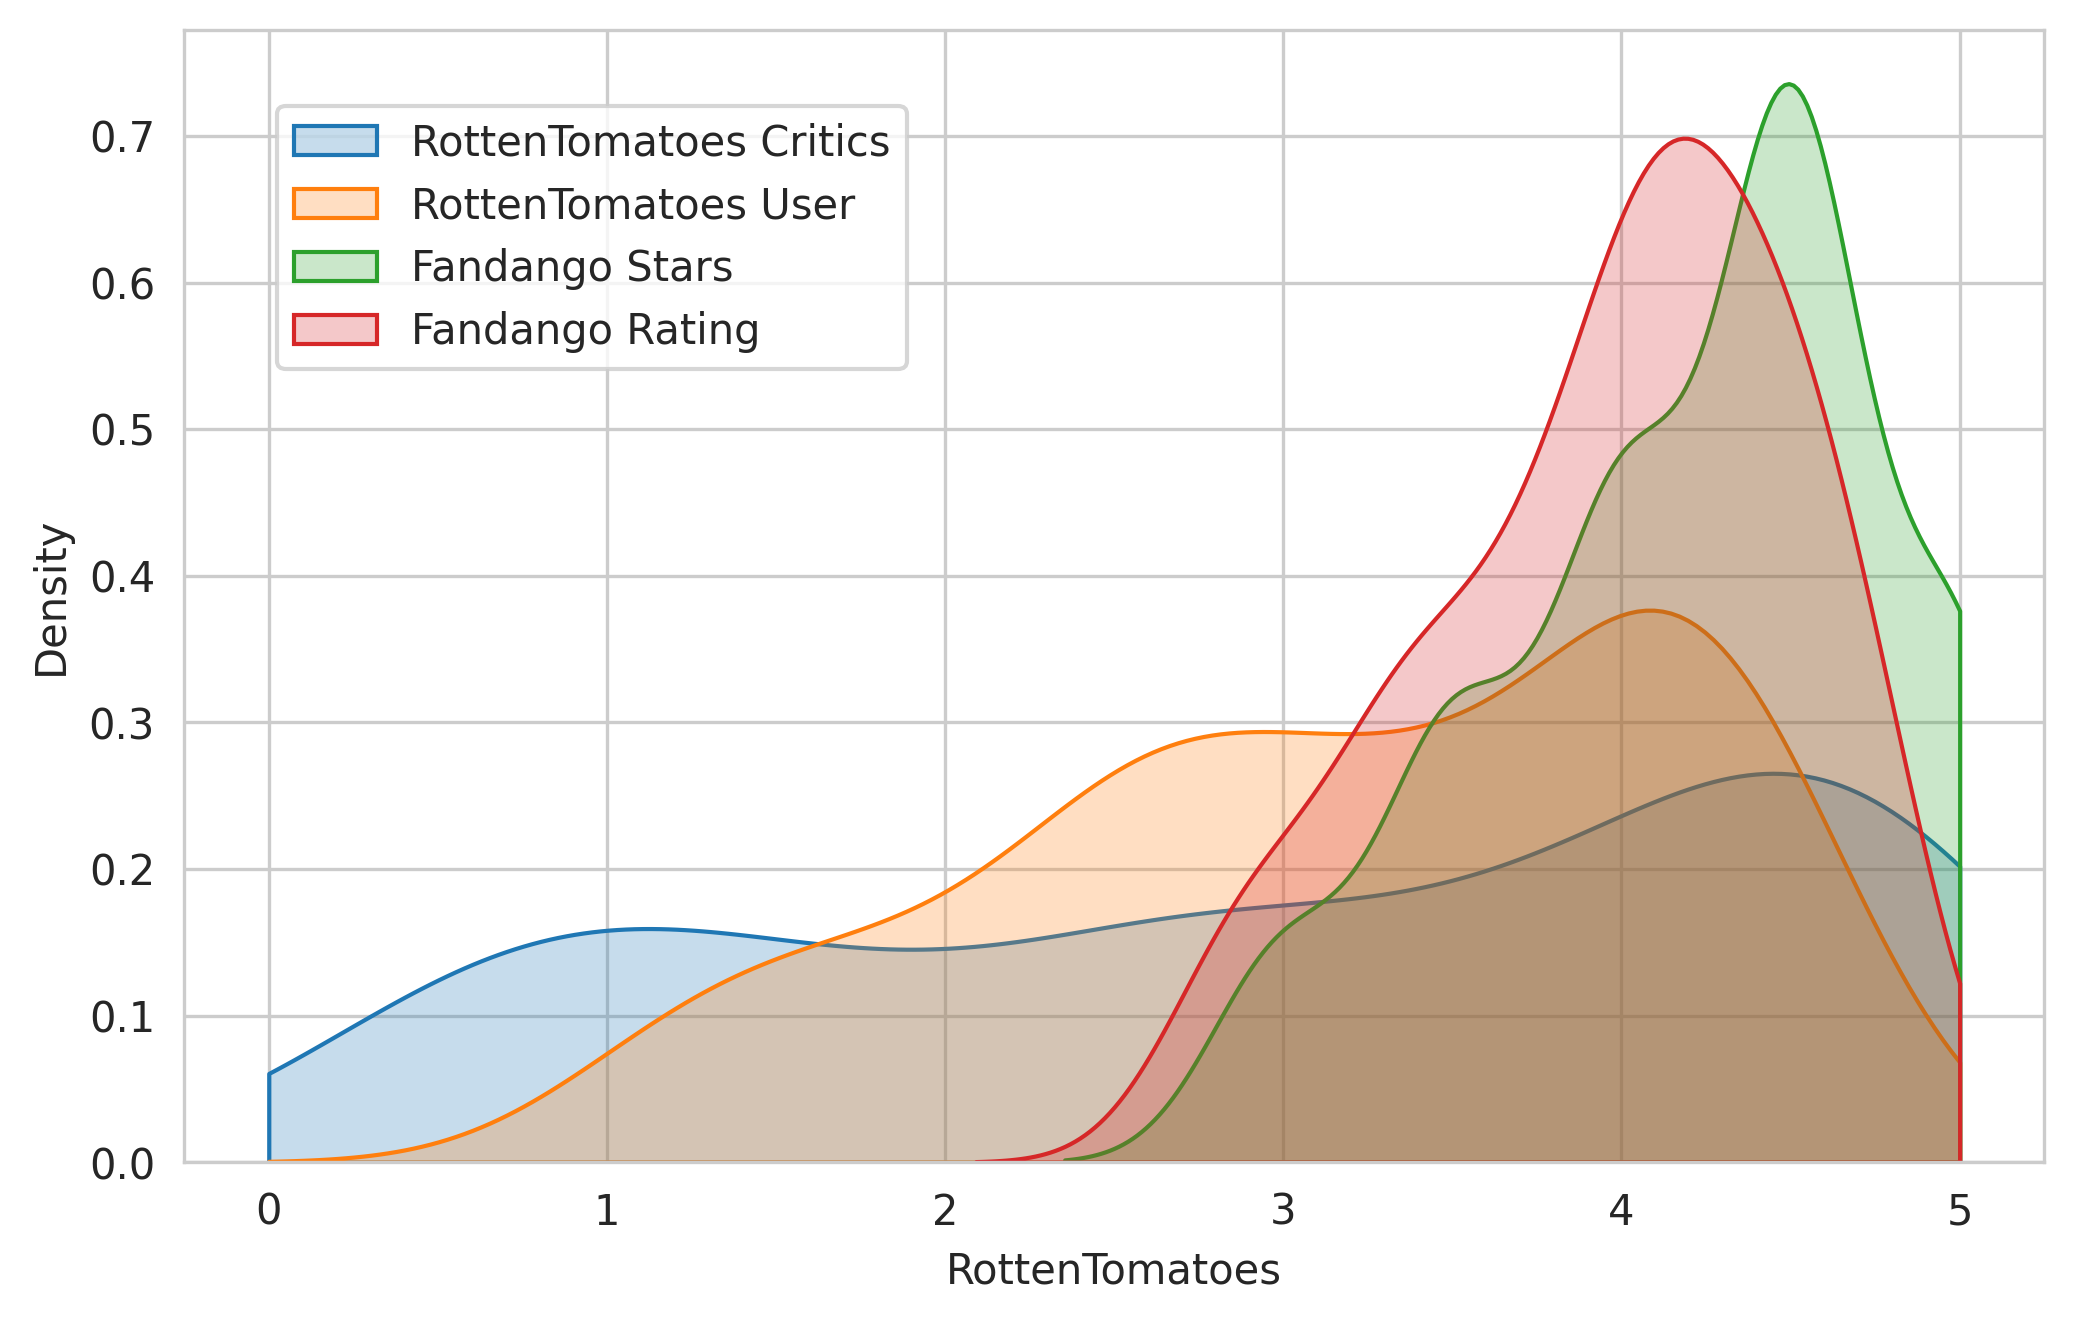

In [ ]:
plt.figure(figsize=(8,5), dpi = 300)
sns.kdeplot(x="RottenTomatoes", data=ratings, fill = True, clip=(0,5), label="RottenTomatoes Critics")
sns.kdeplot(x="RottenTomatoes_User", data=ratings, fill=True, clip=(0,5), label="RottenTomatoes User")
sns.kdeplot(x="Fandango_STARS", data=ratings, fill=True, clip=(0,5), label="Fandango Stars")
sns.kdeplot(x="Fandango_Rating", data=ratings, fill=True, clip=(0,5), label = "Fandango Rating")

plt.legend(loc=(0.05, 0.7))

**Thus we can clearly see that Fandango has an uneven and a right-skewed distribution.**

**Hence it verifies the article on Fandango by [fivethirtyeight](https://fivethirtyeight.com).**